# Problem Statement:

Wine is a beverage made from fermented grapes and other fruit juices with a low amount of alcohol content. Wine is the second most popular alcoholic drink in the world after beer, and it is one of the most highly consumed beverages.

Generally, the quality of wine is graded based on the taste of the wine and vintage but this process is time-consuming, costly, and not efficient as the quality of the wine also depends on other physiochemical attributes like fixed acidity, volatile acidity, etc. Also, it is not always possible to ensure wine quality by experts when there is a huge demand for the product as it will increase the cost significantly.

Moonshine is a red wine company that produces premium high-quality wines. The company wants to improve its production efficiency and reduce the cost and additional time involved in wine tasting.

You as a data scientist at Moonshine company have to build a predictive model that can help to identify the premium quality wines using the available data.

# Objective:

To build a model to predict the quality of the wine.

# Data Description:

- fixed acidity: Fixed Acidity impart sourness and resist microbial infection, measured in no. of grams of tartaric acid per dm3
- volatile acidity: No. of grams of acetic acid per dm3 of wine. Too high levels can lead to an unpleasant, vinegar like taste
- citric acid: No. of grams of citric acid per dm3 of wine. Citric acid can add freshness and flavor to wines
- residual sugar: Remaining sugar after fermentation stops, measured in no. of grams per dm3.
- chlorides: No. of grams of sodium chloride i.e. salt per dm3 of wine
- free sulfur dioxide: No. of grams of free sulphite per dm3 of wine
- total sulfur dioxide: No. of grams of total sulphite (free sulphite+ bound) per dm3 of wine
- density: Density in gram per cm3
- pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic). The pH of the wine can help measure the ripeness of the wine
- sulphates: No. of grams of potassium sulphate per dm3 of wine
- alcohol: Volume of alcohol in percentage 
- quality: Wine quality score between 3 to 8

### Import necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [2]:
wine = pd.read_csv('winequality.csv',sep=';')

In [3]:
# copying data to another varaible to avoid any changes to original data
data = wine.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Understand the shape of the dataset.

In [6]:
data.shape

(1599, 12)

* There are 1,599 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observations-**
* All features are numeric type.
* There are no missing values in the data.

### Summary of the dataset.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Observations-**
* The maximum rating of wine is 8 and the third quartile value is 6 i.e. at least 75% of wines have rating 6 or below.
* There might be outliers in data where the wines have high sulfur dioxide (free sulfur dioxide and total sulfur dioxide) content as there is a big difference in 3rd quartile and maximum values.
* Most wines are on a pH scale between 3 and 4.

### EDA

### Univariate analysis

In [9]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on fixed acidity

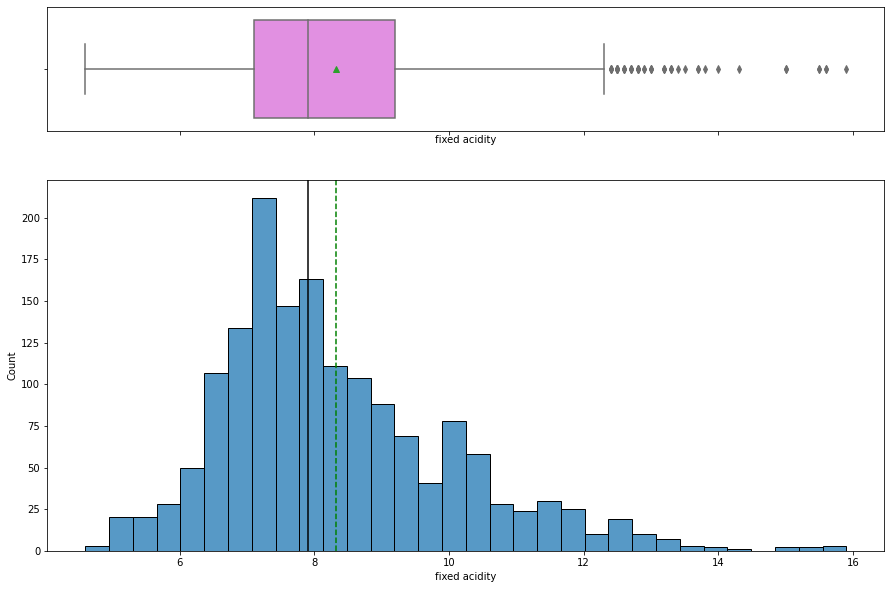

In [10]:
histogram_boxplot(data['fixed acidity'])

* The distribution is nearly symmetric with some outliers to the right. The mean and median values are close to 8 g/dm^3
* The outliers present to the right indicate some wines have higher acidity than others.

### Observations on volatile acidity

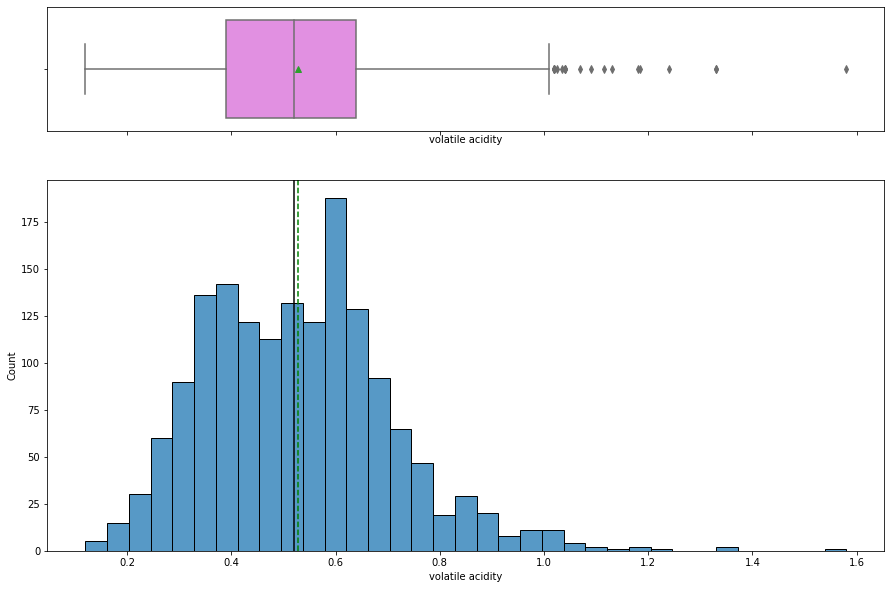

In [11]:
histogram_boxplot(data['volatile acidity'])

* Volatile acidity has a fairly normal distribution with mean and median equal to 0.5.
* Some wines have higher amount of acetic acid that would result in a vinegar like taste of wine, possibly such wines would be rated lower in quality.

### Observations on citric acid

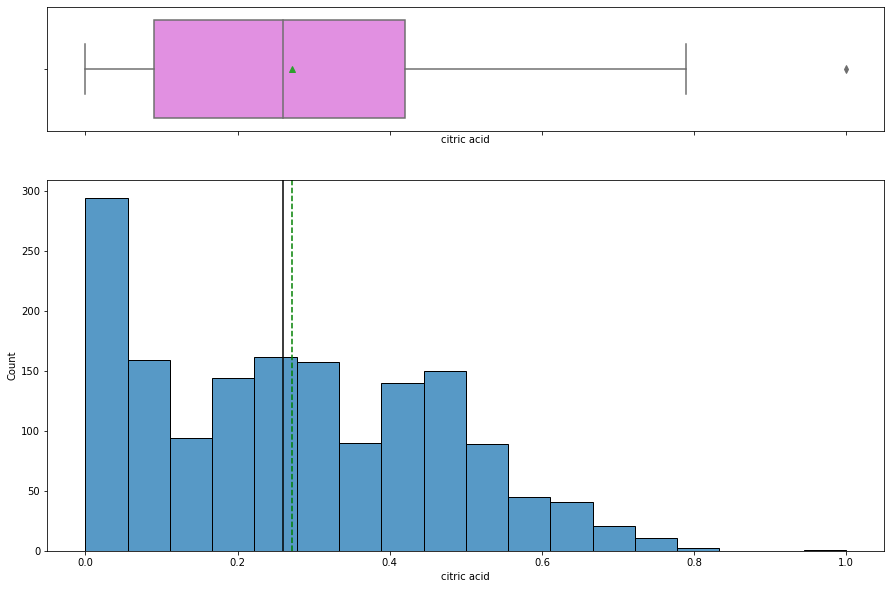

In [12]:
histogram_boxplot(data['citric acid'])

* Citric acidity has a slightly right skewed distribution with mean and median equal to 0.25.
* There is one outlier to the right with high value of citric acid.

### Observations on residual sugar

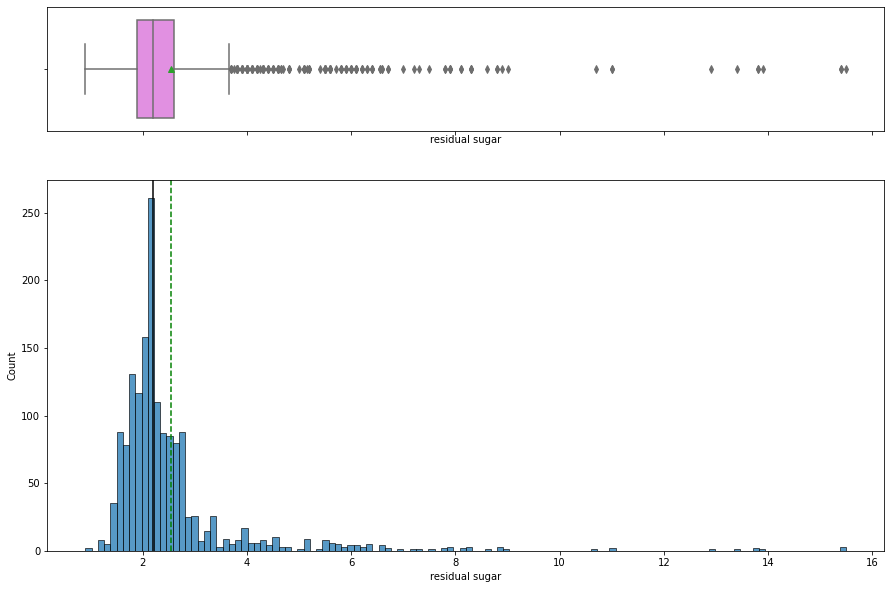

In [13]:
histogram_boxplot(data['residual sugar'])

* Thee distribution of the variable is skewed to the right and there are many extreme values.
* Lesser residual sugar wines(< 1) are rare and we can see that majority of wines are concentrated around 1.5 - 2.5 g/dm^3 i.e. most of the wine have normal residual sugar. 

### Observations on chlorides

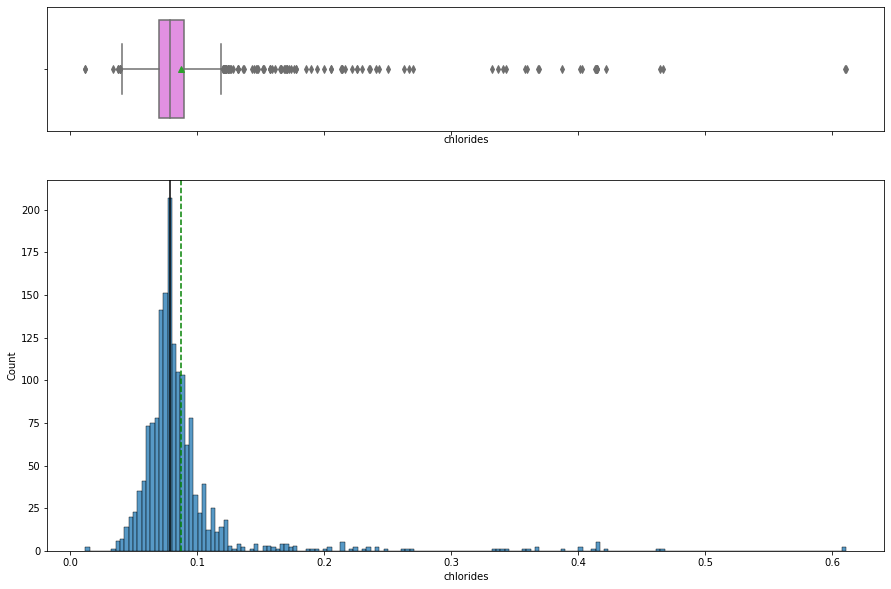

In [14]:
histogram_boxplot(data['chlorides'])

* chlorides has a bell shaped curve distribution.
* From boxplot, we can see that there are outliers on both the sides of whiskers.

### Observations on free sulfur dioxide

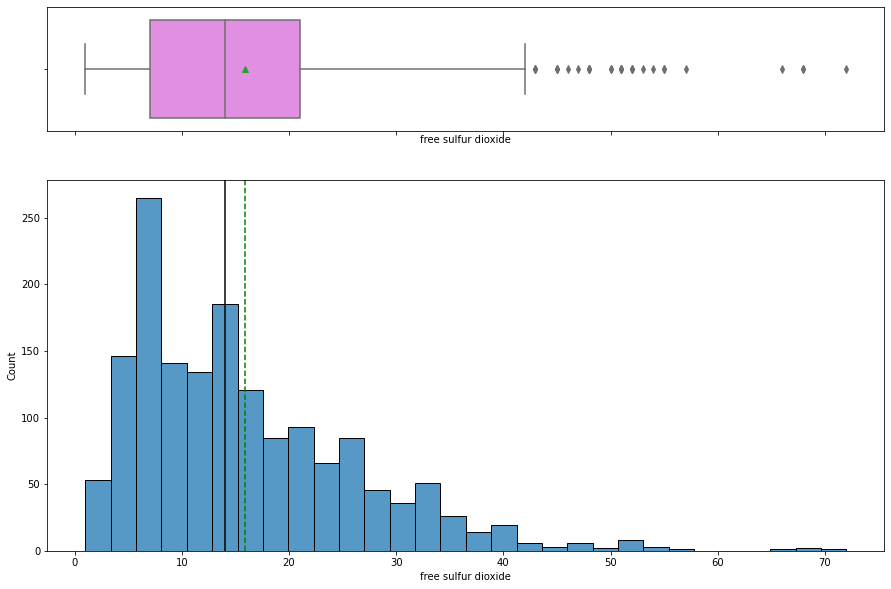

In [15]:
histogram_boxplot(data['free sulfur dioxide'])

* Distribution of free sulfur dioxide is skewed to the right.
* From boxplot, we can see that there are outliers - some wines have high free sulfur dioxide concentration.

### Observations on total sulfur dioxide

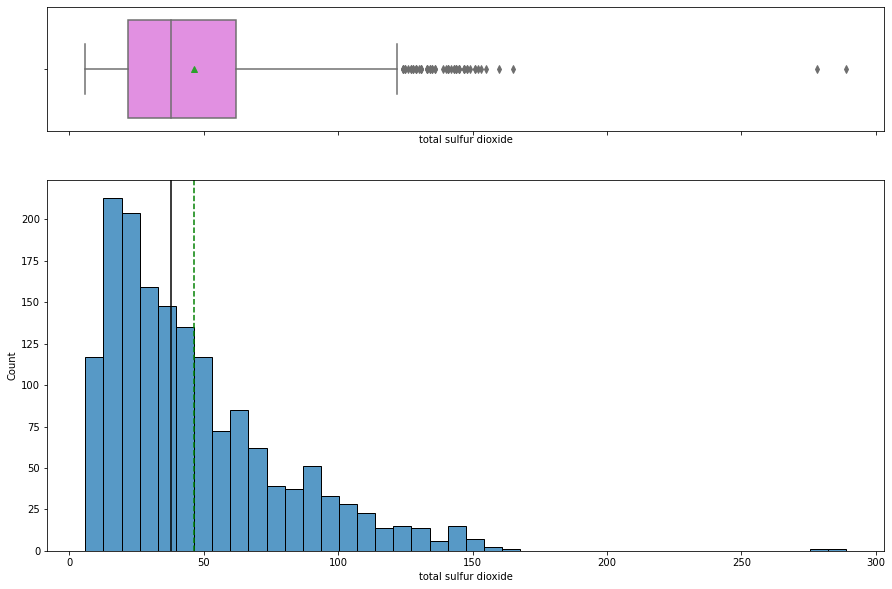

In [16]:
histogram_boxplot(data['total sulfur dioxide'])

* Distribution of total sulfur dioxide concentration is right-skewed. 
* From boxplot, we can see that there are outliers in this variables having higher total sulfur dioxide concentration than others.
* The two extreme values to the right can be considered at outliers. We can cap these value to the next value.

In [17]:
#Calculating top 5 values
data['total sulfur dioxide'].sort_values(ascending=False).head()

1081    289.0
1079    278.0
354     165.0
1244    160.0
651     155.0
Name: total sulfur dioxide, dtype: float64

In [18]:
#Capping the two extreme values
data['total sulfur dioxide']=data['total sulfur dioxide'].clip(upper=165)

### Observations on density

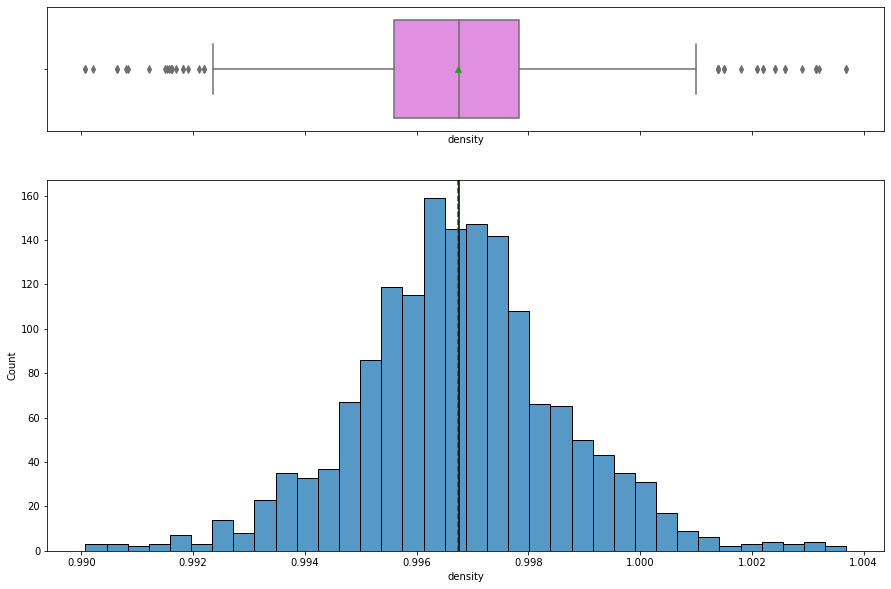

In [19]:
histogram_boxplot(data['density'])

* Distribution of density follows a normal distribution with mean and median equal to ~0.997.
* From boxplot, we can see that there are outliers on both the sides of whiskers indicating some wines are too dense and some very less dense.

### Observations on pH

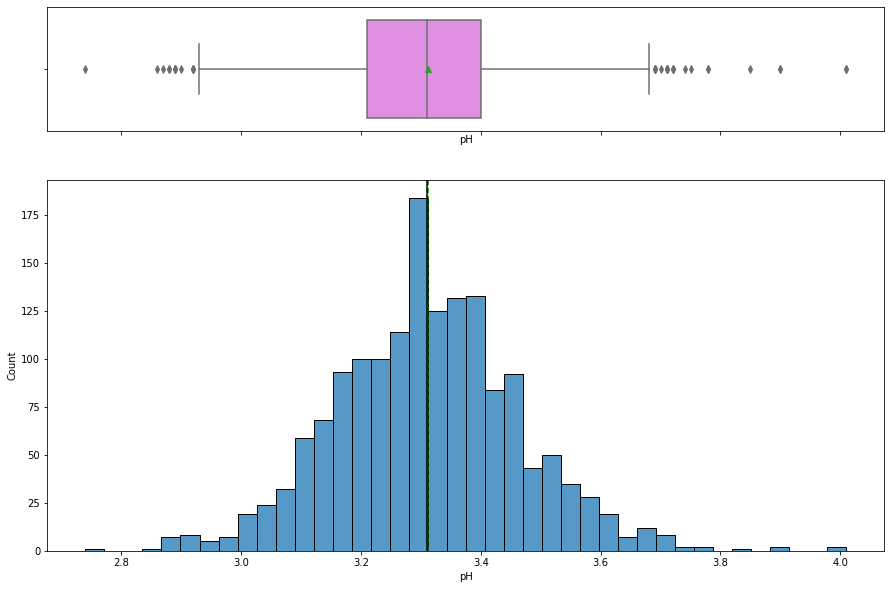

In [20]:
histogram_boxplot(data['pH'])

* Distribution of pH looks normally distributed with mean and median equal to ~3.3, most wines have a pH value around 3.3 i.e. most wines are acidic in nature.
* From boxplot, we can see that there are outliers on both the sides of whiskers.

### Observations on sulphates

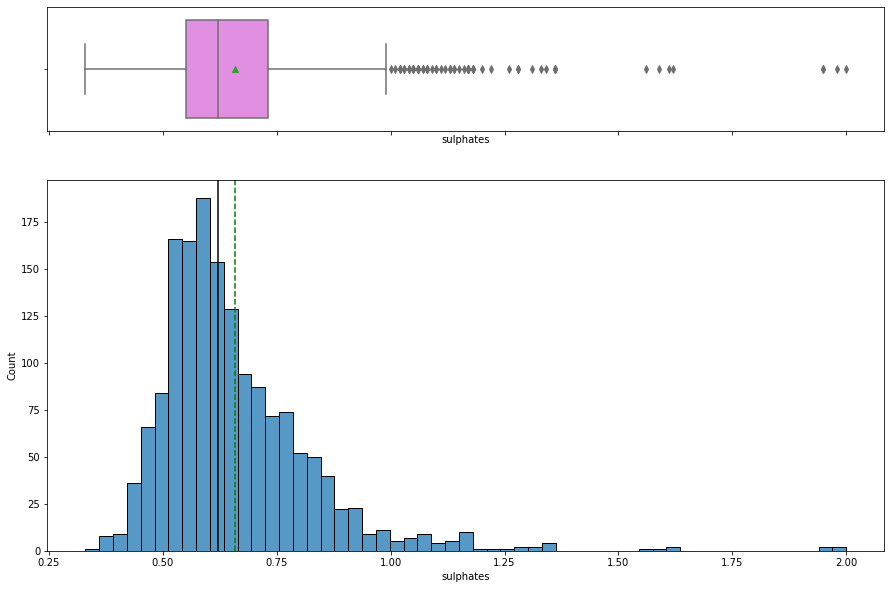

In [21]:
histogram_boxplot(data['sulphates'])

* The distribution of sulphates, which acts as antimicrobial and antioxidant in wines, is right-skewed.
* From boxplot, we can see that there are outliers in this variable i.e. some wines with a very high sulphates than others, can possibly be highly rated wines as sulphates would help them in preserving them for a longer time.

### Observations on alcohol

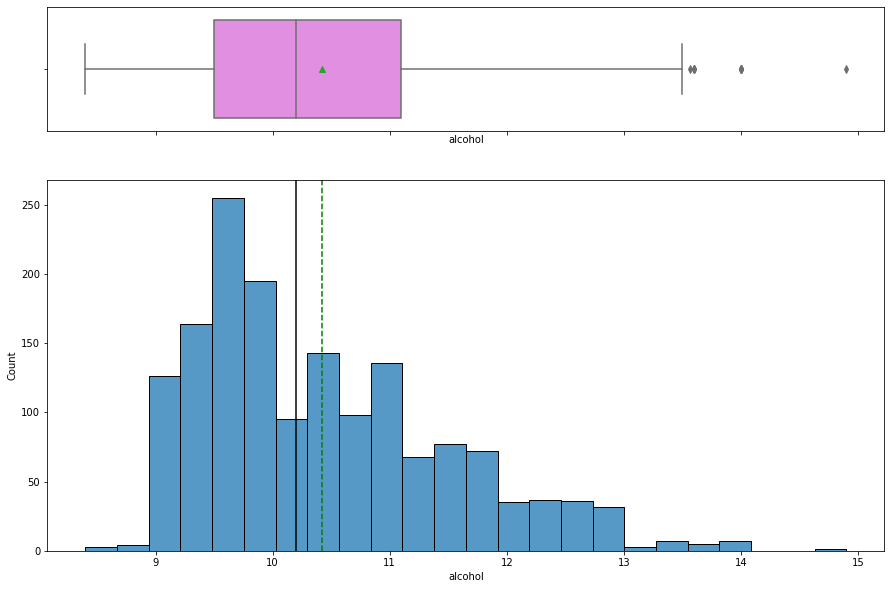

In [22]:
histogram_boxplot(data['alcohol'])

* Most wines have 9% to 10% of alcohol.
* From boxplot, we can see that there are some extreme values for wines having more than 13% of alcohol.

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.15 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

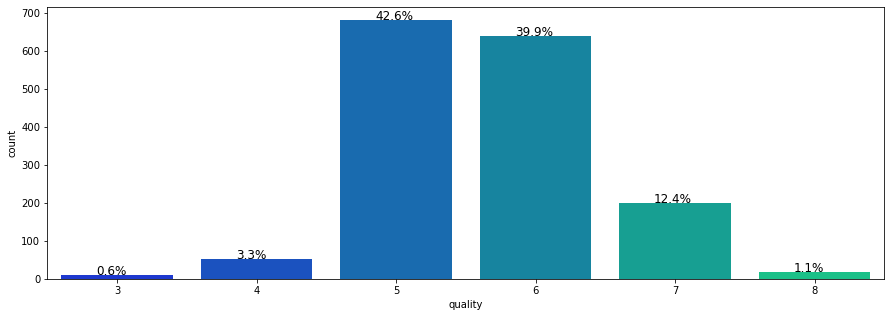

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["quality"],palette='winter')
perc_on_bar(ax,data["quality"])

* Most of the wines are rated either 5 or 6 and there are very less records for 3, 4, and 8 rated wines.
* The observations with 7 or 8 are very less. This might be due to the fact that these are high quality premium wines with maximum rating.
* We can combine records to create two broad categories - premium quality wines and non-premium quality wines, where quality:  2-6 can be one class and quality: 7-8 can be the other class.

In [25]:
# defining bins
bins = (2, 6, 8)
# defining labels
labels = ['non-premium', 'premium']

data['quality_class'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [26]:
data['quality_class'].value_counts()

non-premium    1382
premium         217
Name: quality_class, dtype: int64

* We have reduced the number of categories to only two categories.
* The classes are imbalanced as there are only 217 observations with premium class.

## Bivariate Analysis

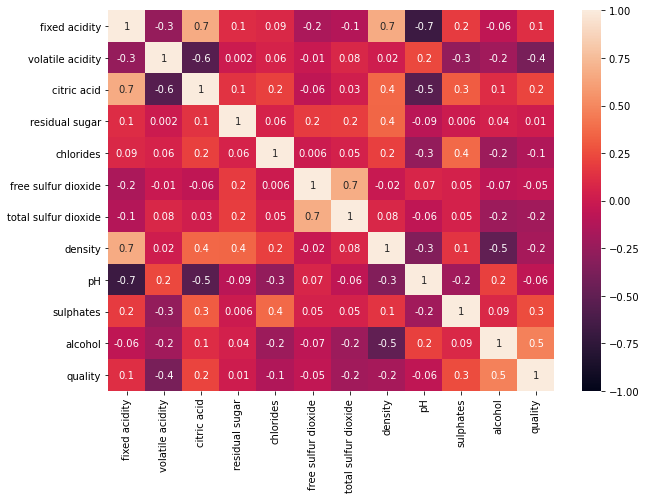

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

* Fixed acidity has a strong positive correlation with citric acid and density.
* The total sulfur dioxide and free sulfur dioxide have a strong correlation.
* The quality of wine shows a moderate correlation with alcohol.

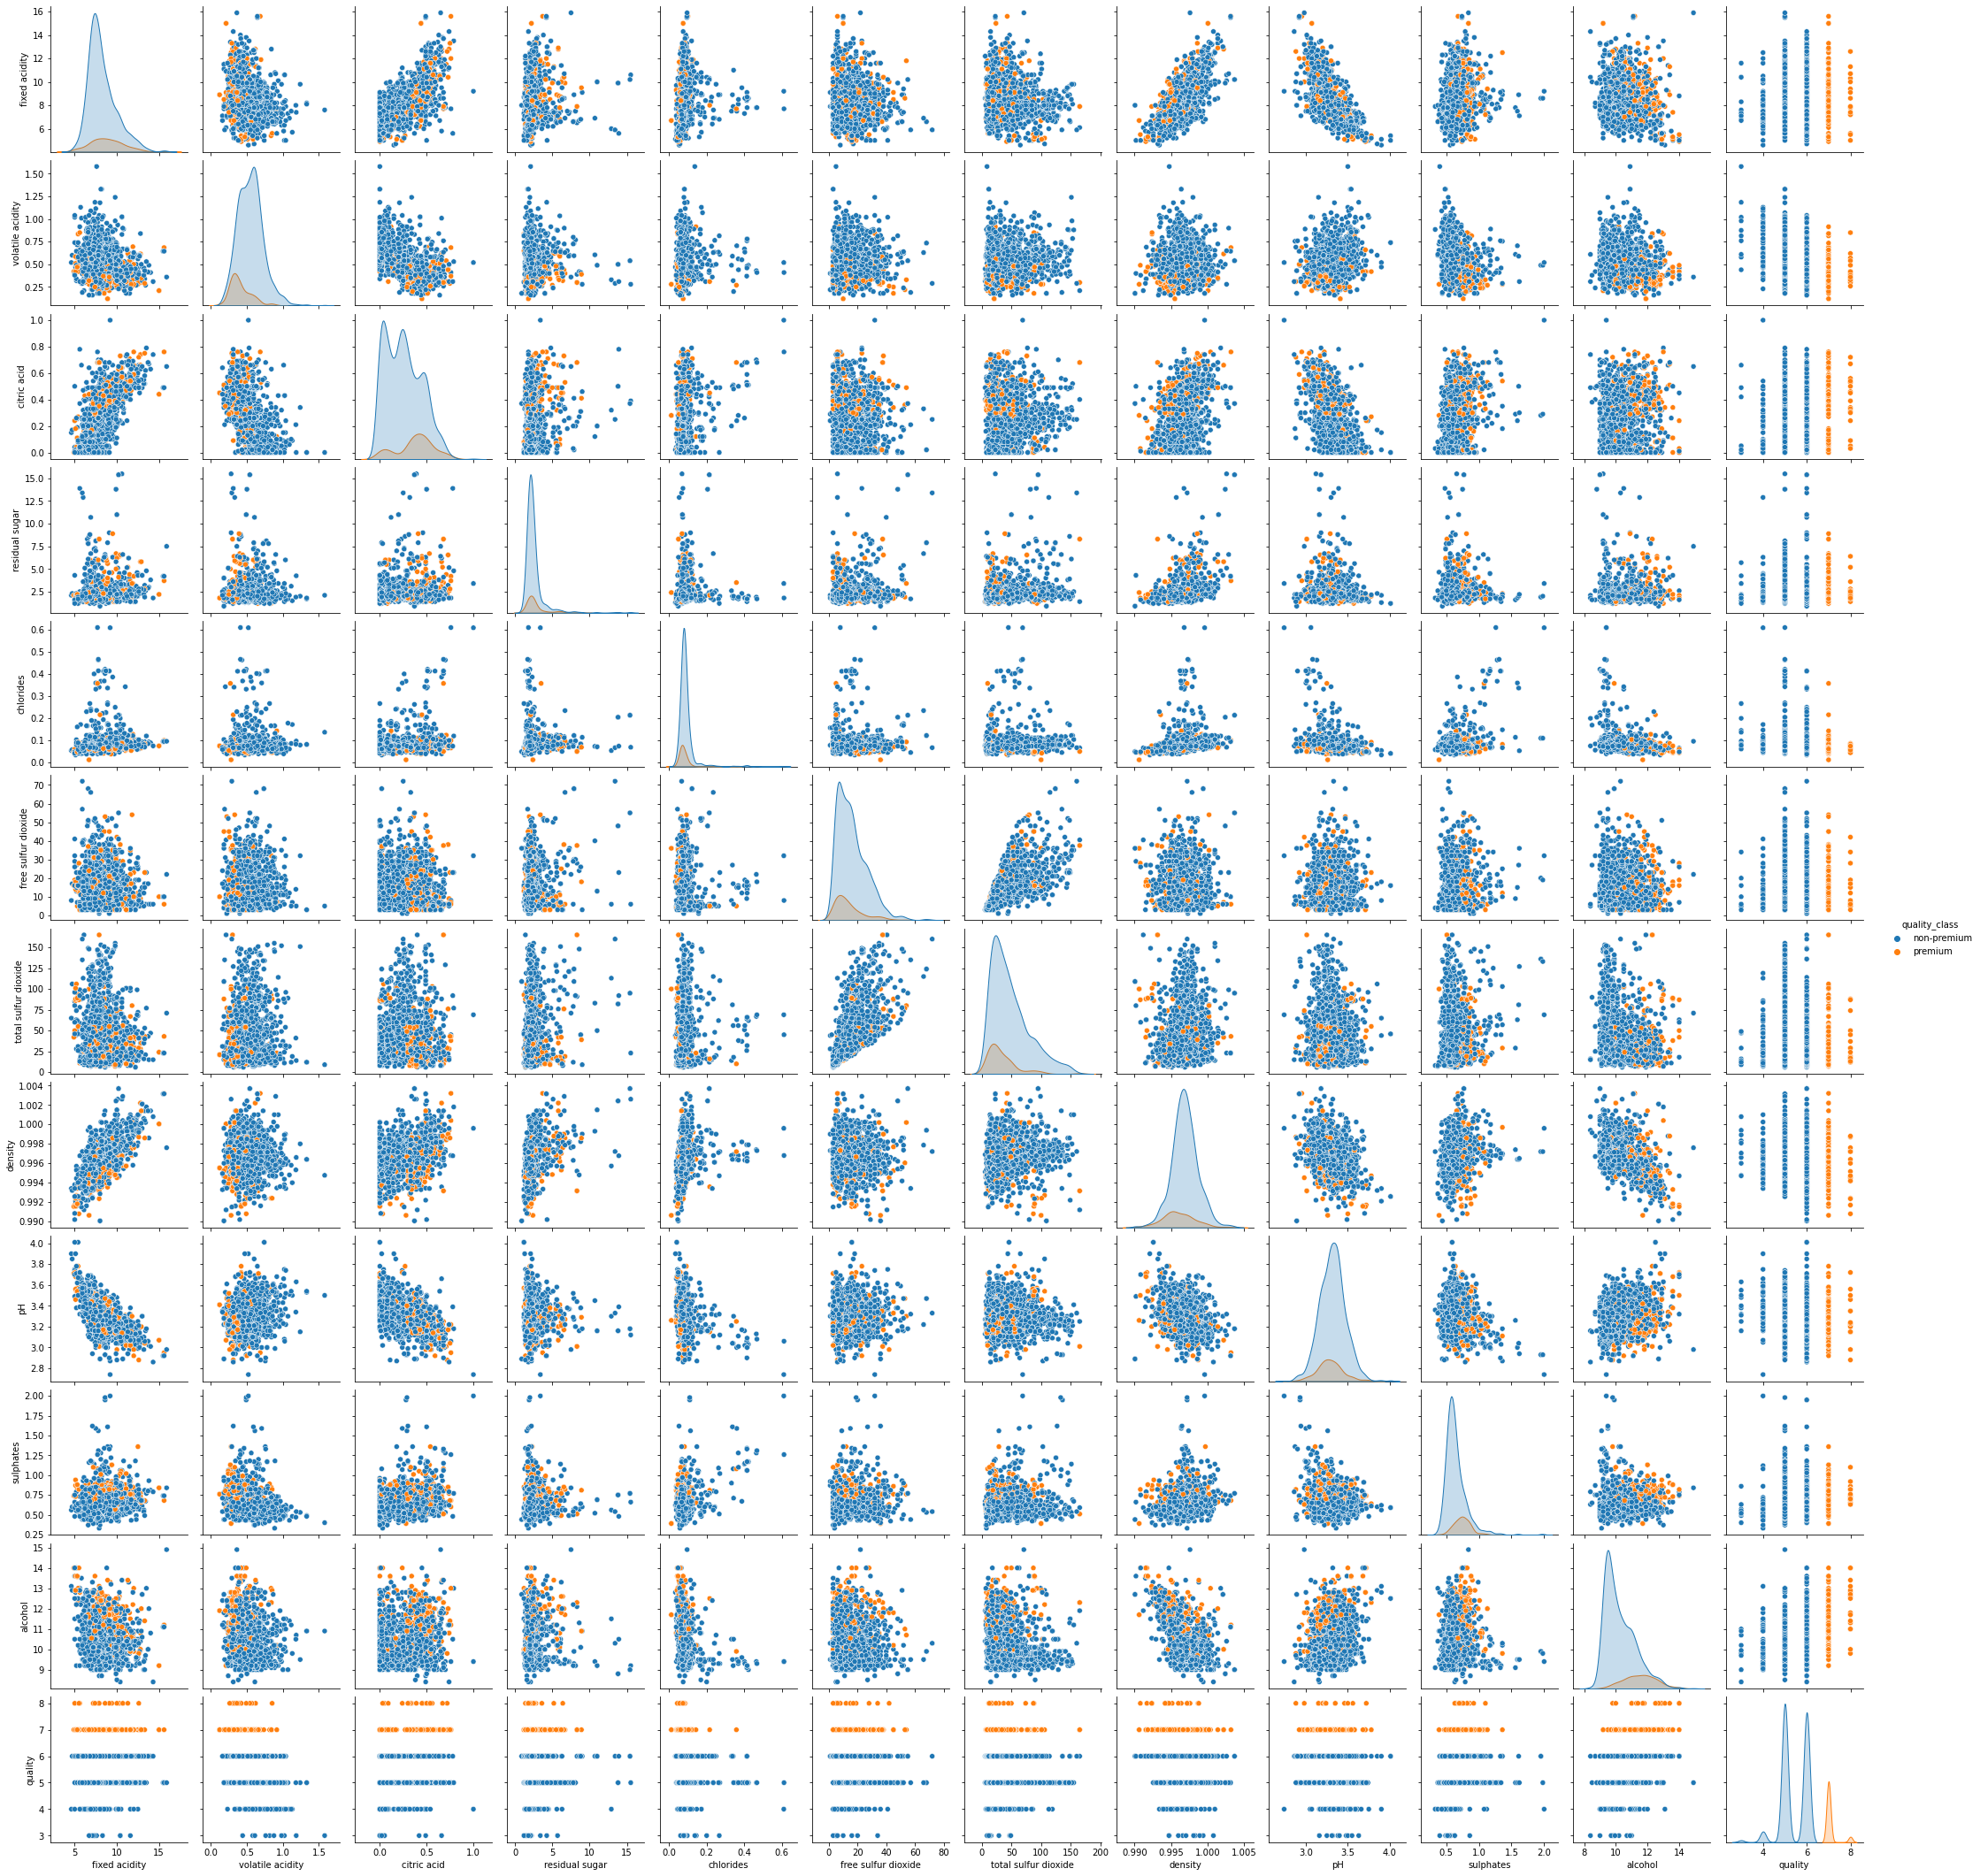

In [28]:
sns.pairplot(data,hue='quality_class')
plt.show()

* There are overlap in the distribution of variables for both the classes. Let's explore this further using other plots.

### Quality vs acidity

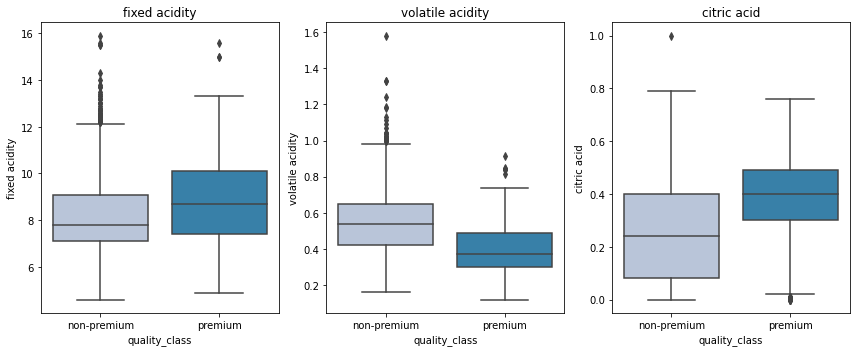

In [29]:
cols = data[['fixed acidity', 'volatile acidity', 'citric acid']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['quality_class'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Premium wines have higher fixed acidity and citric acid and lower volatile acidity.

### Quality vs sulfur

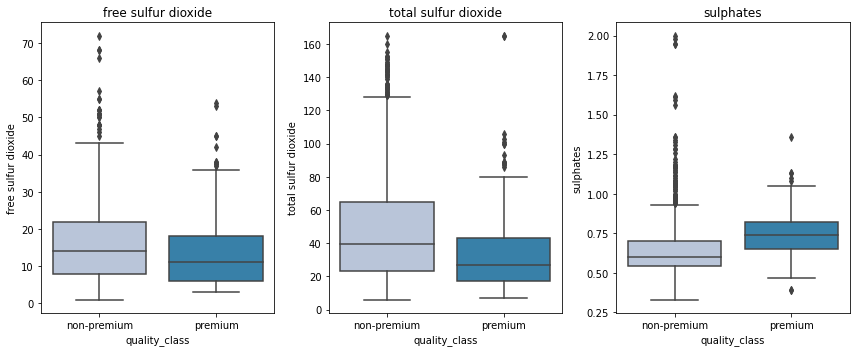

In [30]:
cols = data[['free sulfur dioxide', 'total sulfur dioxide', 'sulphates']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['quality_class'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Premium wines have less concentration of free sulfur dioxide and total sulfur dioxide but higher sulphates that helps in preserving them for a longer period.

### Quality vs chlorides

In [31]:
## function to plot boxplots w.rt quality
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data['quality_class'],x,palette="PuBu")
    plt.show()

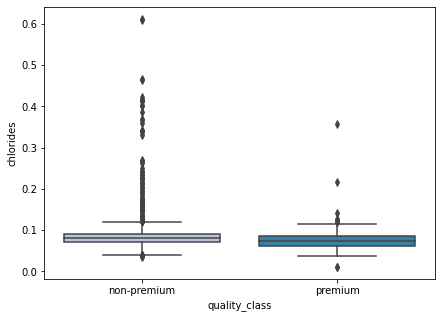

In [32]:
boxplot(data['chlorides'])

* There's not much difference between in the chlorides for both classes.
* There are many outliers for the non-premium wines. It is quite difficult to make an interpretation here, let's turn off the outliers and visualize again.

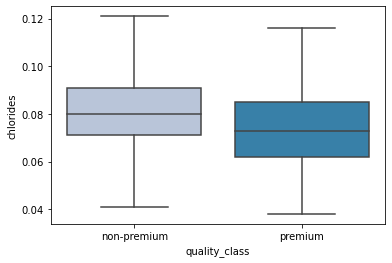

In [33]:
sns.boxplot(data['quality_class'],data['chlorides'],showfliers=False,palette='PuBu');

* Premium wines have lower concentration of chlorides in them.

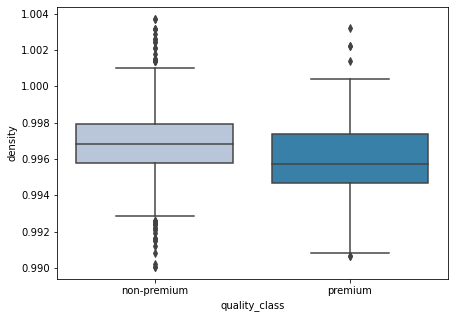

In [34]:
boxplot(data['density'])

* Premium wines have lesser density i.e. they have comparatively thinner than the non-premium wines.

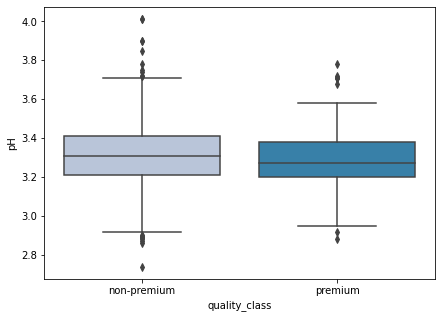

In [35]:
boxplot(data['pH'])

* There is not much difference between the pH value of both type of wines but range of pH value of non-premium wines is higher than the range of pH value of premium wines. This indicates that some non-premium wines are either too acidic or less acidic.

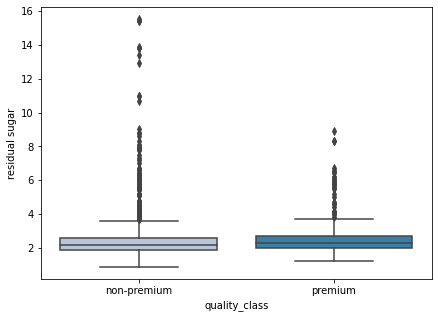

In [36]:
boxplot(data['residual sugar'])

* As we observed earlier some wines have high residual sugar, such wines are rated lower.

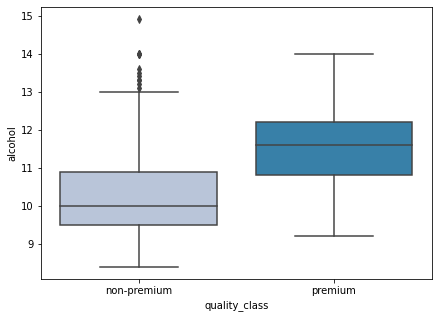

In [37]:
boxplot(data['alcohol'])

* Alcohol content plays a huge role in wine quality. We can see that premium wines have a higher alcohol content as compared to non-premium wines.

## Model Building - Approach
1. Data preparation
2. Split the data into train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparaneter tuning.
5. Test the performance on the test data.

## Split Data

In [38]:
data.drop('quality', axis=1, inplace=True)
X = data.drop('quality_class', axis=1)
y = data['quality_class'].apply(lambda x : 0 if x=='non-premium' else 1 )

In [39]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(1119, 11) (480, 11)


**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [40]:
y.value_counts(1)

0    0.86429
1    0.13571
Name: quality_class, dtype: float64

In [41]:
y_test.value_counts(1)

0    0.864583
1    0.135417
Name: quality_class, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a wine is of premium quality when it is of non-premium quality.
2. Predicting a wine is of non-premium quality when it is of premium quality.

### Which case is more important? 
1. If the model predicts a wine is of non-premium quality but it is of premium quality then the company would incur loss of good wine and resources used.
2. If the model predicts a wine is of premium quality but it is not then the company would roll out low-quality wine which would affect their customer base and their reputation. 

### Which metric to optimize?
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define function to provide metric scores on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [70]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [43]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.8875
Recall on training set :  1.0
Recall on test set :  0.6
Precision on training set :  1.0
Precision on test set :  0.582089552238806
F1-Score on training set :  1.0
F1-Score on test set :  0.5909090909090909


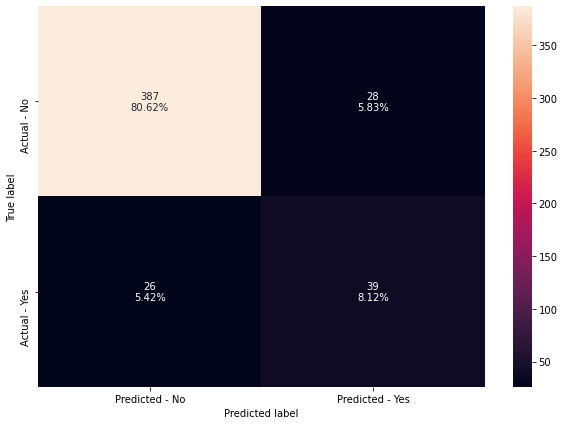

In [71]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* Decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [45]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=4,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Accuracy on training set :  0.8534405719392315
Accuracy on test set :  0.7895833333333333
Recall on training set :  0.8092105263157895
Recall on test set :  0.7076923076923077
Precision on training set :  0.47674418604651164
Precision on test set :  0.359375
F1-Score on training set :  0.6
F1-Score on test set :  0.4766839378238342


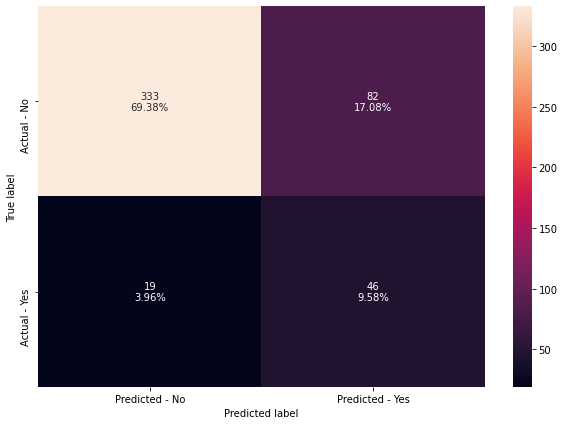

In [72]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

* The overfitting has reduced but the test f1-score has also decreased.
* Let's try some other models.

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.91875
Recall on training set :  1.0
Recall on test set :  0.49230769230769234
Precision on training set :  1.0
Precision on test set :  0.8421052631578947
F1-Score on training set :  1.0
F1-Score on test set :  0.6213592233009708


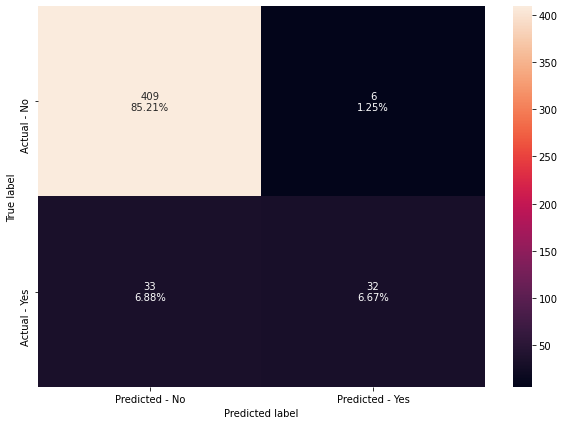

In [73]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* Random forest is giving slightly higher test f1-score than decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [48]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=17, n_estimators=30, oob_score=True,
                       random_state=1)

Accuracy on training set :  0.9320822162645219
Accuracy on test set :  0.8979166666666667
Recall on training set :  0.868421052631579
Recall on test set :  0.7076923076923077
Precision on training set :  0.7021276595744681
Precision on test set :  0.6052631578947368
F1-Score on training set :  0.7764705882352942
F1-Score on test set :  0.6524822695035462


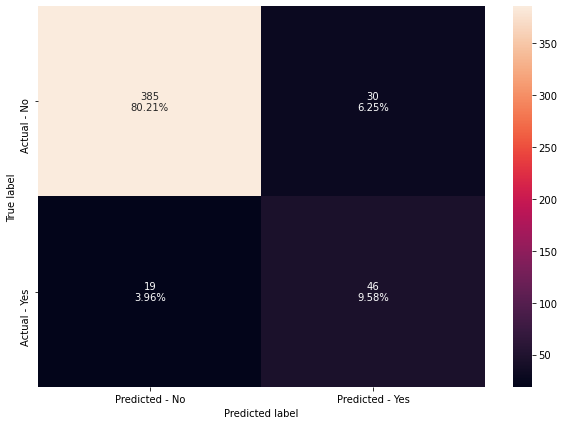

In [74]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score has increased.

## Bagging Classifier

Accuracy on training set :  0.9830205540661304
Accuracy on test set :  0.9166666666666666
Recall on training set :  0.875
Recall on test set :  0.5846153846153846
Precision on training set :  1.0
Precision on test set :  0.7450980392156863
F1-Score on training set :  0.9333333333333333
F1-Score on test set :  0.6551724137931034


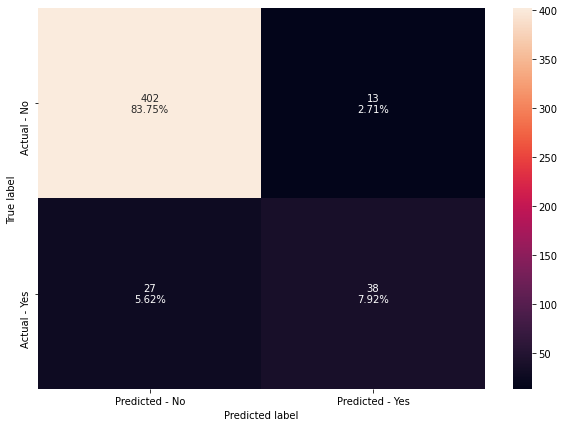

In [75]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

* Bagging classifier is overfiiting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [51]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  0.9991063449508489
Accuracy on test set :  0.90625
Recall on training set :  0.993421052631579
Recall on test set :  0.46153846153846156
Precision on training set :  1.0
Precision on test set :  0.75
F1-Score on training set :  0.9966996699669968
F1-Score on test set :  0.5714285714285714


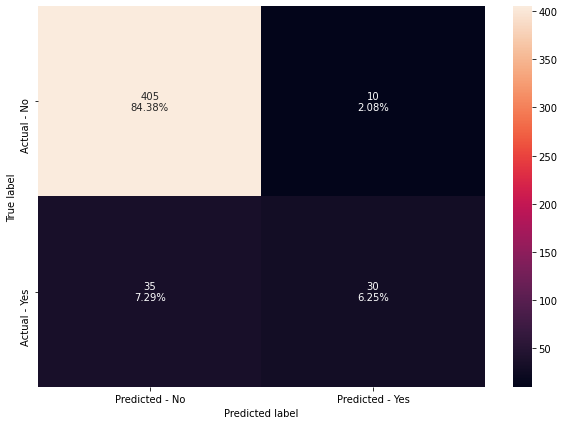

In [76]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

* Surprisingly,the model performance has decreased after hyperparameter tuning.
* Let's try now try boosting models.

## AdaBoost Classifier

Accuracy on training set :  0.9133154602323503
Accuracy on test set :  0.875
Recall on training set :  0.5657894736842105
Recall on test set :  0.4153846153846154
Precision on training set :  0.7350427350427351
Precision on test set :  0.5510204081632653
F1-Score on training set :  0.6394052044609665
F1-Score on test set :  0.47368421052631576


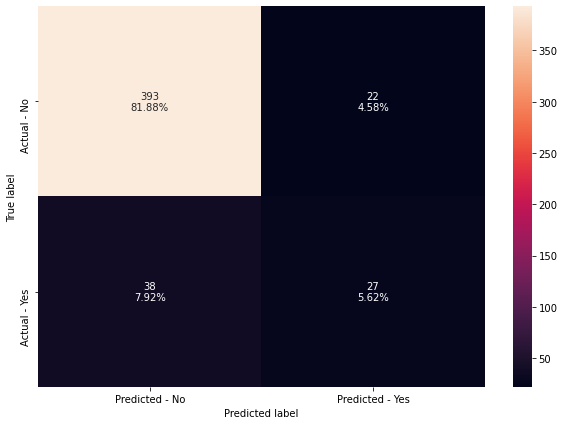

In [77]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [54]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.4000000000000001, n_estimators=40,
                   random_state=1)

Accuracy on training set :  0.9892761394101877
Accuracy on test set :  0.8770833333333333
Recall on training set :  0.9342105263157895
Recall on test set :  0.49230769230769234
Precision on training set :  0.9861111111111112
Precision on test set :  0.5517241379310345
F1-Score on training set :  0.9594594594594595
F1-Score on test set :  0.5203252032520326


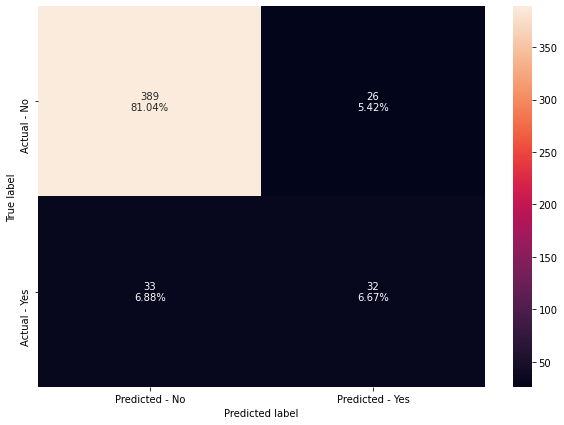

In [78]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

* The model performance has increased slightly but the model has started to overfit the training data.

## Gradient Boosting Classifier

Accuracy on training set :  0.9696157283288651
Accuracy on test set :  0.90625
Recall on training set :  0.7828947368421053
Recall on test set :  0.49230769230769234
Precision on training set :  0.9916666666666667
Precision on test set :  0.7272727272727273
F1-Score on training set :  0.875
F1-Score on test set :  0.5871559633027523


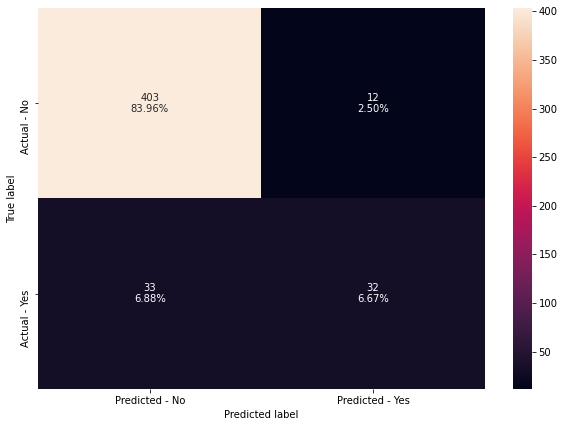

In [79]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

* The gradient boosting classifier is overfitting the training data.

### Hyperparameter Tuning

In [57]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

Accuracy on training set :  0.9946380697050938
Accuracy on test set :  0.90625
Recall on training set :  0.9605263157894737
Recall on test set :  0.5076923076923077
Precision on training set :  1.0
Precision on test set :  0.717391304347826
F1-Score on training set :  0.9798657718120806
F1-Score on test set :  0.5945945945945945


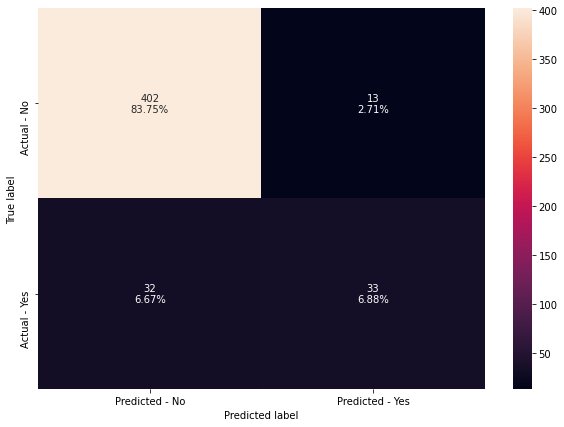

In [80]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

* There is not much difference in the model performance after hyperparameter tuning.

## XGBoost Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9166666666666666
Recall on training set :  1.0
Recall on test set :  0.5384615384615384
Precision on training set :  1.0
Precision on test set :  0.7777777777777778
F1-Score on training set :  1.0
F1-Score on test set :  0.6363636363636364


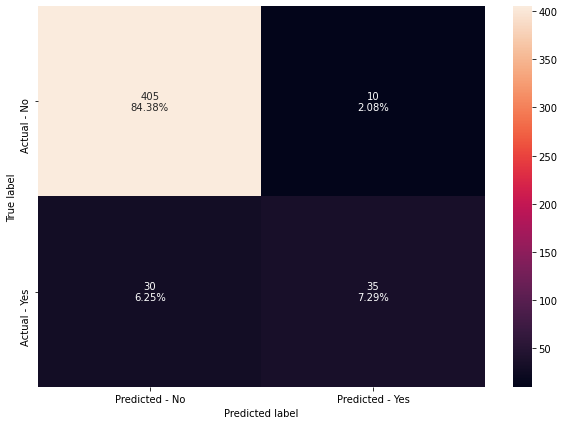

In [81]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

* Xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [60]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9633601429848079
Accuracy on test set :  0.8916666666666667
Recall on training set :  0.9868421052631579
Recall on test set :  0.6461538461538462
Precision on training set :  0.7936507936507936
Precision on test set :  0.5915492957746479
F1-Score on training set :  0.8797653958944281
F1-Score on test set :  0.6176470588235294


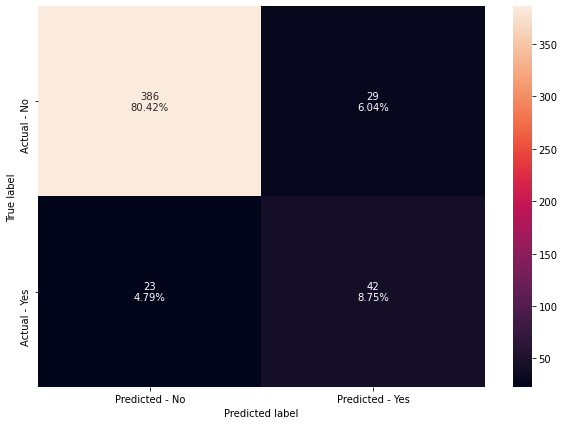

In [82]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.

## Stacking Classifier

In [63]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       max_features='sqrt',
                                                       min_samples_leaf=6,
                                                       min_samples_split=17,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                   

Accuracy on training set :  0.935656836461126
Accuracy on test set :  0.8833333333333333
Recall on training set :  0.9605263157894737
Recall on test set :  0.676923076923077
Precision on training set :  0.6886792452830188
Precision on test set :  0.5569620253164557
F1-Score on training set :  0.8021978021978022
F1-Score on test set :  0.611111111111111


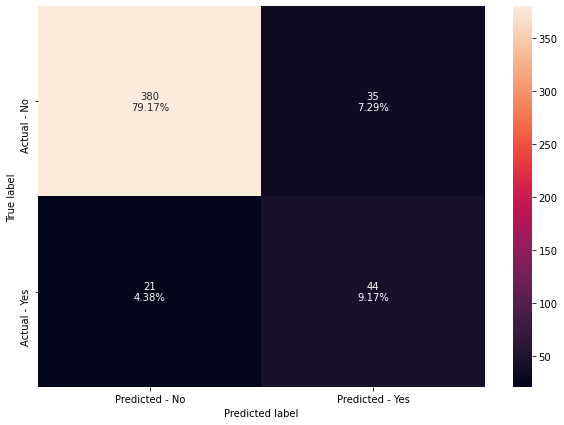

In [83]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

* The stacking classifier is giving similar performance as compared to XGBoost with slightly less overfitting.
* The confusion matrix shows that the model is able to identify the majority of premium quality wines but it is better at identifying non-premium quality wines.

## Comparing all models

In [84]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [85]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
4,Bagging Classifier,0.983021,0.916667,0.875000,0.584615,1.000000,0.745098,0.933333,0.655172
3,Tuned Random Forest,0.932082,0.897917,0.868421,0.707692,0.702128,0.605263,0.776471,0.652482
10,XGBoost Classifier,1.000000,0.916667,1.000000,0.538462,1.000000,0.777778,1.000000,0.636364
2,Random Forest,1.000000,0.918750,1.000000,0.492308,1.000000,0.842105,1.000000,0.621359
11,Tuned XGBoost Classifier,0.963360,0.891667,0.986842,0.646154,0.793651,0.591549,0.879765,0.617647
12,Stacking Classifier,0.935657,0.883333,0.960526,0.676923,0.688679,0.556962,0.802198,0.611111
9,Tuned Gradient Boosting Classifier,0.994638,0.906250,0.960526,0.507692,1.000000,0.717391,0.979866,0.594595
0,Decision Tree,1.000000,0.887500,1.000000,0.600000,1.000000,0.582090,1.000000,0.590909
8,Gradient Boosting Classifier,0.969616,0.906250,0.782895,0.492308,0.991667,0.727273,0.875000,0.587156
5,Bagging Classifier Tuned,0.999106,0.906250,0.993421,0.461538,1.000000,0.750000,0.996700,0.571429


* Majority of the models are overfitting the training data in terms of f1-score.
* Bagging classifier is giving the highest f1-score on the test data but is overfitting the training data.
* The tuned random forest has given the second highest test f1-score and is giving more generalized performance as compared to the bagging classifier. 

### Feature importance of Tuned Random Forest

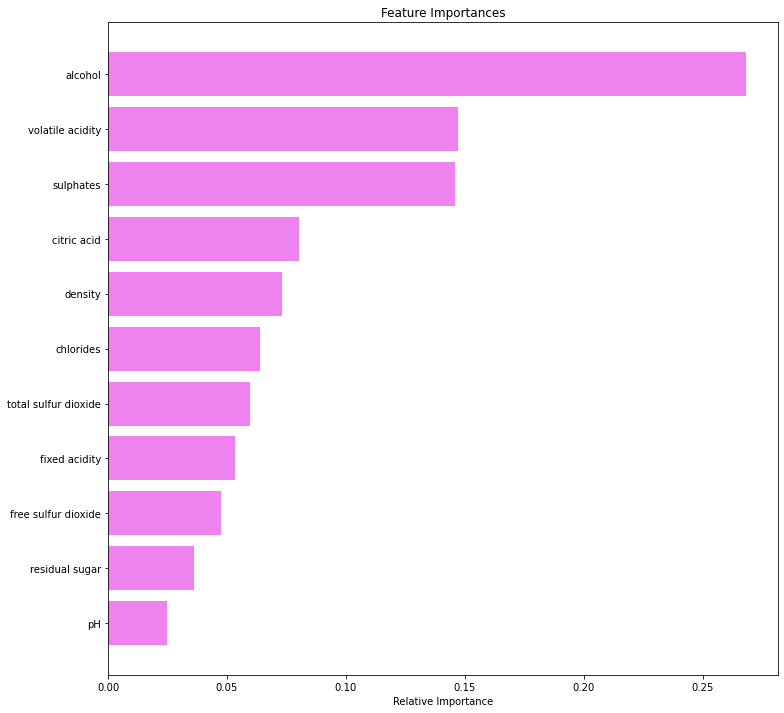

In [68]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Alcohol is the most important feature in identifying premium quality wine followed by sulphates and volatile acidity.

## Conclusion:

- On the basis of our analysis, we can say that the premium quality wine has following features in comparison to the non-premium quality wine: 
    - Higher concentration of alcohol.
    - A fair and higher concentration of sulphates. Fair indicates smaller range of values or less extreme values. 
    - Less volatile acidity.
    - Higher fixed acidity.
    - Higher citric acid concentration.
    - A fair and lower concentration of total sulfur dioxide and free sulfur dioxide.
    - Lower concentration of chlorides.
    - Lesser density.
    - A fair pH level i.e. neither very acidic or very less acidic.
- The company should be more precise with the concentration and level of alcohol, volatile acidity, and sulphates as these are the most important factors in determining the quality of wines. For example, the common alcohol level for the premium quality wine should be between 11-13%.
- Once the desired performance is achieved from the model, the company can use it to identify the premium quality wines for new production. This would help to reduce the cost and increase the efficiency of the process.